In [11]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [12]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P2.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  



In [13]:
#DOWNLOAD INFO OF THE TREE
times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree["hit_pmt_charges"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

mpmt_id_branch = tree["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])

In [14]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_sorted, charge_branch_sorted)

Event 161: spill_ChargeTT applied 2 times
Event 670: spill_ChargeTT applied 2 times
Event 777: spill_ChargeTT applied 2 times
Event 836: spill_ChargeTT applied 2 times
Event 1400: spill_ChargeTT applied 2 times
Event 1446: spill_ChargeTT applied 2 times


In [15]:
times_branch_modified, threshold_times = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_modified_chargesTT)

Event 25: spill_nHitsTT applied 2 times
Event 207: spill_nHitsTT applied 2 times
Event 244: spill_nHitsTT applied 2 times
Event 279: spill_nHitsTT applied 2 times
Event 368: spill_nHitsTT applied 2 times
Event 430: spill_nHitsTT applied 2 times
Event 485: spill_nHitsTT applied 2 times
Event 502: spill_nHitsTT applied 2 times
Event 576: spill_nHitsTT applied 2 times
Event 612: spill_nHitsTT applied 2 times
Event 617: spill_nHitsTT applied 2 times
Event 664: spill_nHitsTT applied 2 times
Event 697: spill_nHitsTT applied 2 times
Event 715: spill_nHitsTT applied 2 times
Event 734: spill_nHitsTT applied 2 times
Event 783: spill_nHitsTT applied 2 times
Event 812: spill_nHitsTT applied 2 times
Event 1057: spill_nHitsTT applied 2 times
Event 1063: spill_nHitsTT applied 2 times
Event 1077: spill_nHitsTT applied 2 times
Event 1150: spill_nHitsTT applied 2 times
Event 1196: spill_nHitsTT applied 2 times
Event 1234: spill_nHitsTT applied 2 times
Event 1275: spill_nHitsTT applied 2 times
Event 1346

In [6]:
print(threshold_charges)
print(threshold_times)

{0: [119974.41772460938, 222068.19783125], 1: [79641.59936523438, 119974.40600585938], 2: [40711.04923574219, 119974.40112304688, 239042.89394027344], 3: [88741.09262171875, 119974.39318847656], 4: [119974.39318847656], 5: [119974.435546875], 6: [119974.419921875, 200368.30894015625], 7: [119974.42272949219, 160656.4315723047], 8: [119974.40698242188], 9: [119974.45178222656, 140587.9583453125, 141229.66341265626], 10: [119974.47875976562], 11: [119974.40698242188, 198772.5917], 12: [119974.40698242188, 258528.1358264297], 13: [119966.60229492188, 126048.36998984375, 147969.03863457032, 209100.7579060547], 14: [26503.421264648438, 119966.62194824219, 154068.64836039062], 15: [119966.59655761719], 16: [119966.60229492188], 17: [54811.028135039065, 101173.44747734375, 119966.59020996094], 18: [119966.60888671875], 19: [119966.59020996094, 188168.15751640624, 253859.43659921875], 20: [119966.63623046875], 21: [119966.6240234375, 123881.9228671875, 195205.40990058595], 22: [119966.62194824

In [9]:
merged_thresholds = {}

# Fusión de los dos diccionarios
for key, values in threshold_charges.items():
    merged_thresholds[key] = values.copy()

for key, values in threshold_times.items():
    if key in merged_thresholds:
        merged_thresholds[key].extend(values)
    else:
        merged_thresholds[key] = values.copy()

# Verificar si hay duplicados en alguna clave
for key, values in merged_thresholds.items():
    if len(values) != len(set(values)):
        print(f"Duplicados detectados en la clave: {key}")




In [10]:
print(merged_thresholds)

total = sum(len(lista) for lista in merged_thresholds.values())
print("Total de elementos en todas las listas:", total)

{0: [119974.41772460938, 222068.19783125, 225111.87715539063], 1: [79641.59936523438, 119974.40600585938, 58273.16474023437, 74158.72694726562, 82682.61042558594, 82907.69821855468], 2: [40711.04923574219, 119974.40112304688, 239042.89394027344, 91860.0288794922], 3: [88741.09262171875, 119974.39318847656], 4: [119974.39318847656, 99436.93738359374], 5: [119974.435546875], 6: [119974.419921875, 200368.30894015625, 203606.3454578125, 203722.68887929688], 7: [119974.42272949219, 160656.4315723047, 194434.32850019532], 8: [119974.40698242188], 9: [119974.45178222656, 140587.9583453125, 141229.66341265626, 242312.88437007813], 10: [119974.47875976562], 11: [119974.40698242188, 198772.5917, 201352.66766145313, 202158.13903953126], 12: [119974.40698242188, 258528.1358264297], 13: [119966.60229492188, 126048.36998984375, 147969.03863457032, 209100.7579060547, 9808.704474414062, 46248.54764827344], 14: [26503.421264648438, 119966.62194824219, 154068.64836039062, 66518.64325260156, 72245.379226

In [ ]:
print(threshold_charges)
print(threshold_times)

total = sum(len(lista) for lista in threshold_charges.values())
print("Total de elementos en todas las listas:", total)

coincidencias = 0
diferencias = 0

all_keys = set(threshold_charges) | set(threshold_times)

for key in all_keys:
    set_charges = set(threshold_charges.get(key, []))
    set_times = set(threshold_times.get(key, []))

    coincidencias += len(set_charges & set_times)
    diferencias += len(set_charges ^ set_times)


print(f"Coincidencias totales: {coincidencias}")
print(f"Diferencias totales: {diferencias}")

print("en total", (coincidencias + diferencias))

In [ ]:
trigger_times_half = dict(list(threshold_charges.items())[0:10])
bin_time = 2

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch[event_number]
        charges_branch_event = charge_branch[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + 50)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + 50), bins=int(50/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+50)

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time)

        axs[1].bar(np.arange(start_time, start_time+50, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [u.a]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(start_time, start_time+50)
        plt.tight_layout()
        plt.show()

In [17]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.colors as colors
sys.path.append("/home/cgarcia_2002/WCTE_event_display-main/WCTE_event_display-main")

from EventDisplay import EventDisplay

In [18]:
print(threshold_times)
print(threshold_charges)

{0: [225111.87715539063], 1: [58273.16474023437, 74158.72694726562, 82682.61042558594, 82907.69821855468], 2: [91860.0288794922], 4: [99436.93738359374], 6: [203606.3454578125, 203722.68887929688], 7: [194434.32850019532], 9: [242312.88437007813], 11: [201352.66766145313, 202158.13903953126], 13: [9808.704474414062, 46248.54764827344], 14: [66518.64325260156, 72245.37922621093], 15: [25075.472785742186, 52811.41023328125], 16: [131232.6378494922, 131402.14559527344], 17: [104018.93999046875, 104559.0307961328], 20: [203458.29566398438], 21: [19883.734723632813, 70047.86610332031, 193199.3564523828], 23: [54685.12381875, 59650.07762734375, 91201.33422070312, 180558.78646503907], 24: [42247.05227910156], 25: [219387.4074928125, 233979.93505234376, 250325.85624414062, 250766.40279882812, 251205.8501015625, 250465.81007128907], 30: [128260.89522578125], 33: [102679.69540410156], 34: [236744.17116613282, 253606.84860839843], 37: [36198.151689257815], 38: [506.6620955078125, 23103.3547724609

(2014,)


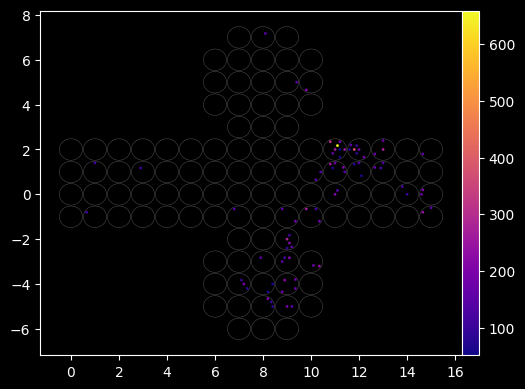

In [22]:
t_evento = 40711.04923574219
event_id = 2
delta = 50


# Leer datos
times = tree["hit_pmt_calibrated_times"].array(library="np")
charges = tree["hit_pmt_charges"].array(library="np")
slot_ids = tree["hit_mpmt_slot_ids"].array(library="np")
pmt_positions = tree["hit_pmt_position_ids"].array(library="np")

t = times[event_id]
q = charges[event_id]
slot = slot_ids[event_id]
pos = pmt_positions[event_id]

# Filtrar por tiempo cercano al evento deseado
mask = (t > t_evento - delta) & (t < t_evento + delta)

# Aplicar filtro
t = t[mask]
q = q[mask]
slot = slot[mask]
pos = pos[mask]

# Combinar en canal único para EventDisplay
channel_ids = slot * 19 + pos

# ---------- VISUALIZAR EVENTO ----------

# Crear instancia del EventDisplay
eventDisplay = EventDisplay()
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')
eventDisplay.load_wcsim_tubeno_mapping("geofile_WCTE.txt")

# Procesar y graficar
data_to_plot = eventDisplay.process_data(channel_ids, q)
eventDisplay.plotEventDisplay(data_to_plot, color_norm=colors.Normalize(), style="dark_background")
plt.show()
#plt.savefig(f"evento_filtrado_{event_id}_{t_evento}.png")
#plt.close()


77


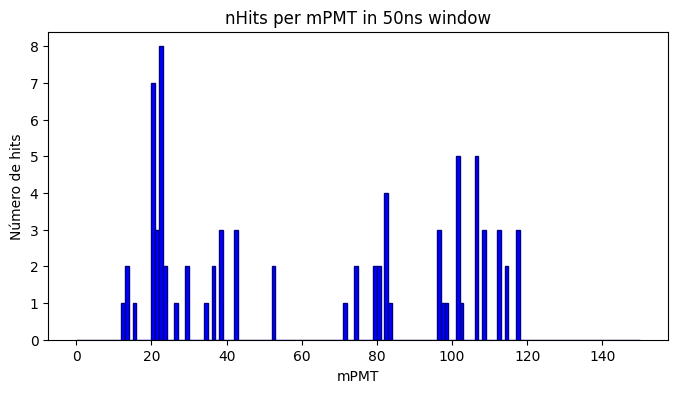

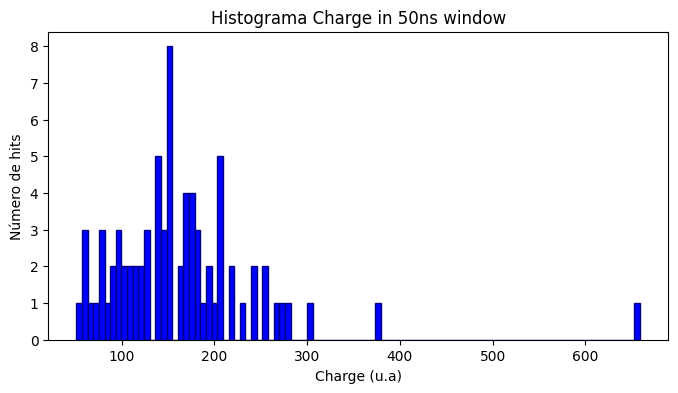

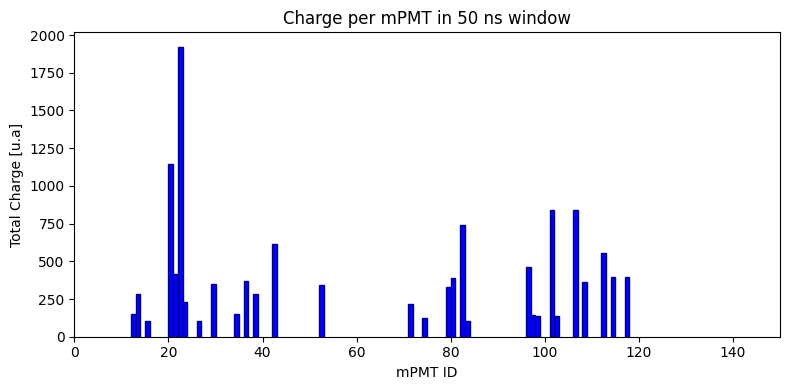

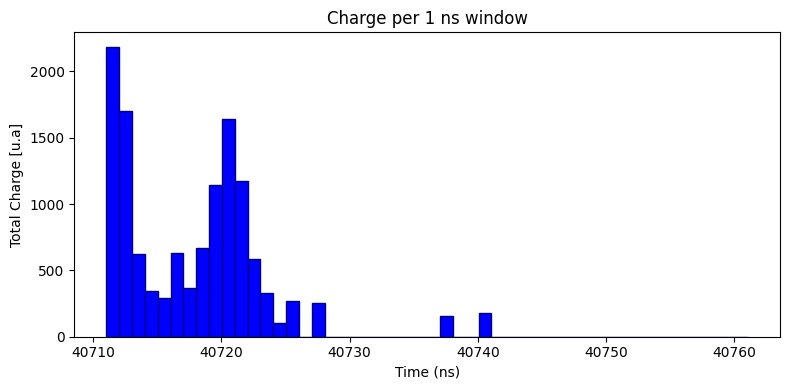

In [23]:
# Definimos el rango de interés
t_min = t_evento
t_max = t_min + 50

mpmt_id_branch_event = mpmt_id_branch[event_id] 
times_branch_event = times_branch[event_id]
charge_branch_event = charge_branch[event_id]


# Seleccionamos los índices de los elementos que cumplen la condición
indices_en_rango = np.where((times_branch_event >= t_min) & (times_branch_event < t_max))[0]
print(len(times_branch_event[indices_en_rango]))
mpmt_id = mpmt_id_branch_event[indices_en_rango]
charge = charge_branch_event[indices_en_rango]
time = times_branch_event[indices_en_rango]

plt.style.use('default')
plt.figure(figsize=(8, 4))
plt.hist(mpmt_id, bins=150, range = [0, 150], color='blue', edgecolor='navy')
plt.xlabel('mPMT')
plt.ylabel('Número de hits')
plt.title("nHits per mPMT in 50ns window")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(charge, bins=100, color='blue', edgecolor='navy')
plt.xlabel('Charge (u.a)')
plt.ylabel('Número de hits')
plt.title("Histograma Charge in 50ns window")
plt.show()


functions_spills.plot_TotalCharge_mPMT(mpmt_id, charge)

bin_time = 1
sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time)

# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.bar(np.arange(min(time), min(time)+50, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
plt.xlabel("Time (ns)")
plt.ylabel("Total Charge [u.a]")
plt.title(f"Charge per {bin_time} ns window")
plt.tight_layout()
plt.show()

In [ ]:
# Convert to arrays (optional but neat)
X = np.array(time)     # time
Y = np.array(mpmt_id)     # mPMT
Z = np.array(charge)   # charge

print(len(X), len(Y), len(Z))
# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, Y, Z, c=Z, cmap='viridis', s=50)
ax.set_ylim(0, 150) 
ax.set_xlabel("Time [ns]")
ax.set_ylabel("mPMT ID")
ax.set_zlabel("Charge [C]")
ax.set_title("Each Hit: Time vs mPMT vs Charge")
fig.colorbar(sc, label="Charge [C]")

plt.tight_layout()
plt.show()

In [ ]:
# Define bin edges
x = np.arange(0, 50, 2)    # Time bins (e.g. 50 ns range, 1 ns per bin)
y = np.arange(0, 150, 1)   # mPMT ID bins (0 to 149)

# Create the meshgrid for plotting (dimensions: [mPMT, time])
X, Y = np.meshgrid(x, y)

# Get bin indices using your custom binning function
i = (time - np.min(time))//2
j = mpmt_id // 1       # mPMT bins

# Initialize Z matrix: rows = mPMTs, cols = time bins
z = np.zeros((len(y), len(x)))  # Shape: (150, 50)

# Fill the Z matrix with summed charge
for time_i, mpmt_j, charge_k in zip(i, j, charge):
    z[int(mpmt_j), int(time_i)] += charge_k

# Plot the heatmap
plt.figure(figsize=(12, 6))
pcm = plt.pcolormesh(X, Y, z, shading='auto', cmap='viridis')

# Labels and colorbar
plt.xlabel("Time [ns]")
plt.ylabel("mPMT ID")
plt.title("Heatmap: Charge per mPMT vs Time")
cbar = plt.colorbar(pcm)
cbar.set_label("Charge [C]")

plt.tight_layout()
plt.show()